In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


colors = sns.color_palette("muted").as_hex()
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams["figure.figsize"] = (9, 5)

In [11]:
df = pd.DataFrame()
for proj in ["JPetStore", "DayTrader", "AcmeAir", "Plants"]:
	with open(f"../results/Mono2Multi_Full/Mono2Multi_Full_{proj}.json") as f:
		data = json.load(f)
	new_df = pd.DataFrame(data).drop(["microservices", "n_clusters"], axis=1)
	# new_df = pd.DataFrame(data).drop(["microservices"], axis=1)
	new_df = new_df[(new_df["alpha"] != 0) & (new_df["alpha"] != 1)]
	new_df = new_df.groupby("alpha", as_index=False).mean()
	# new_df["project"] = proj
	df = pd.concat([df, new_df])
df = df.groupby("alpha", as_index=False).mean()

In [12]:
df

,alpha,threshold,SM,IFN,NED,ICP
0,0.05,0.5,-0.169123,1.579096,0.742477,0.429146
1,0.10,0.5,-0.151547,1.592209,0.745299,0.428573
2,0.15,0.5,-0.209043,1.594142,0.748911,0.430172
3,0.20,0.5,-0.121619,1.567968,0.750139,0.425000
4,0.25,0.5,-0.110046,1.564867,0.754744,0.421870
5,0.30,0.5,-0.039837,1.575812,0.756522,0.419105
6,0.35,0.5,-0.017592,1.562957,0.752799,0.419950
7,0.40,0.5,-0.034154,1.535397,0.752613,0.418362
8,0.45,0.5,-0.073067,1.527872,0.756503,0.420963
9,0.50,0.5,-0.060250,1.550004,0.755152,0.408937


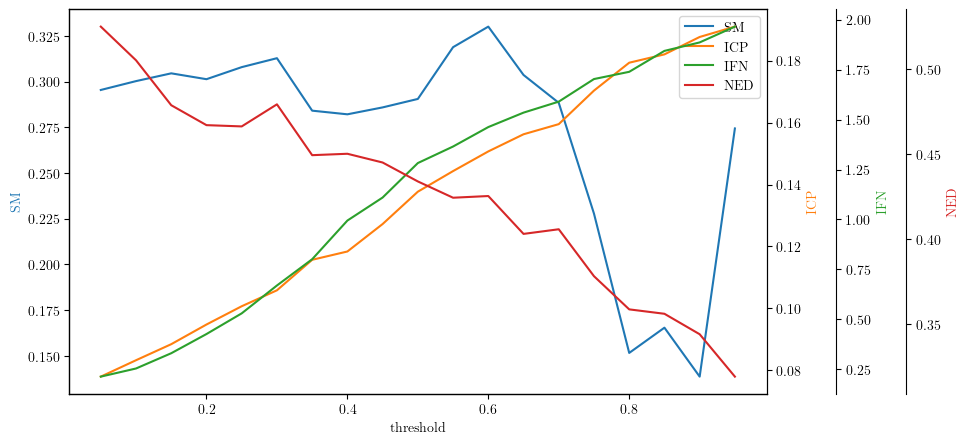

In [9]:
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))
p1, = ax.plot(df["threshold"], df["SM"], "-C0", label="SM")
p2, = twin1.plot(df["threshold"], df["ICP"], "-C1", label="ICP")
p3, = twin2.plot(df["threshold"], df["IFN"], "-C2", label="IFN")
p4, = twin3.plot(df["threshold"], df["NED"], "-C3", label="NED")
# p1.set_color(colors[0])
# p2.set_color(colors[1])
# p3.set_color(colors[2])
# p4.set_color(colors[3])
ax.set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="IFN")
twin3.set(ylabel="NED")
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
ax.legend(handles=[p1, p2, p3, p4])
# fig.savefig("JPetStoreLineChart.pdf", bbox_inches="tight")

In [13]:
def get_top_percent(df, percent, metric, ascending=True):
	df_sorted = df.sort_values(by=metric, ascending=ascending)
	n_top = int(len(df) * percent)
	top = df_sorted.head(n_top)
	thresholds_top = top['alpha'].tolist()
	return set(sorted(thresholds_top))

In [14]:
sm = get_top_percent(df, 0.3, "SM", ascending=False)
icp = get_top_percent(df, 0.5, "ICP")
ifn = get_top_percent(df, 0.5, "IFN")
ned = get_top_percent(df, 0.9, "NED")
print(sorted(list(sm.intersection(icp, ifn, ned))))

[0.6, 0.8, 0.85, 0.9, 0.95]


In [ ]:
# [0.05, 0.1]
# [0.8, 0.85, 0.9, 0.95]